# TensorRT

## Introduction to TensorRT

NVIDIA ® TensorRT TM is an SDK for optimizing trained deep learning models to enable high-
performance inference. TensorRT contains a deep learning inference optimizer for trained
deep learning models, and a runtime for execution.
After you have trained your deep learning model in a framework of your choice, TensorRT
enables you to run it with higher throughput and lower latency.

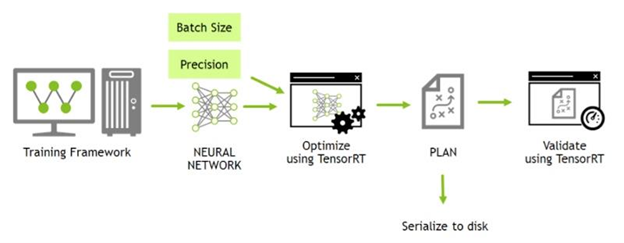

#### How does TensorRT perform optimization?

1. Precision Caliberation
2. Layer and Tensor Fusion
3. Kernel Auto-Tuning
4. Dynamic Tensor Memory
5. Mulit-Stream Execution

## Optimization of Pytorch model using TensorRT through ONNX

TensorRT is a great way to take a trained Pytorch model and optimize it to run more efficiently during inference on an NVIDIA GPU.

One approach to convert a Pytorch model to TensorRT is to export a Pytorch model to ONNX and then convert it into a TensorRT engine. Below image depicts the way to convert and deploy a Pytorch model.

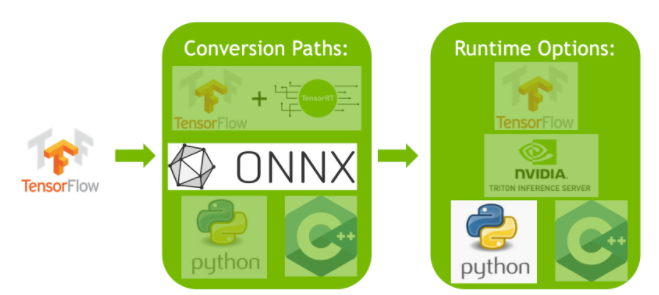



#### Important decision points to deploy Pytorch model to TensorRT Python runtime 

1. What format should I save my model in?
2. What batch size am I running inference at?
3. What precision am I running infernce at?
4. What TensorRT path am I using to convert my model?
5. What runtime am I targeting?

## Example : Optimizing Yolov7 Pytorch model using TensorRT through ONNX

#### Check the L4T version and TensorRT version

In [6]:
print("L4T version is : ")
! cat /etc/nv_tegra_release

print("TensorRT version is : ")
! dpkg-query -W tensorrt

L4T version is : 
# R32 (release), REVISION: 7.4, GCID: 33514132, BOARD: t210ref, EABI: aarch64, DATE: Fri Jun  9 04:25:08 UTC 2023
TensorRT version is : 
tensorrt	8.2.1.8-1+cuda10.2


#### Follow the steps to setup your jetson to work with yolov7


Go through the link and follow the steps:

https://www.hackster.io/spehj/deploy-yolov7-to-jetson-nano-for-object-detection-6728c3

#### Check the Pytorch version 

In [10]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())

True
1
0


In [2]:
!pwd

/home/rptech/HER/yolo/yolov7/notebook


In [8]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.6.9 (default, Mar 10 2023, 16:46:00) 
[GCC 8.4.0], sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0) 
Pytorch version: 1.8.0 


#### Clone the YOLOv7 repository

In [10]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7

In [ ]:
#download the trained weights of yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [4]:
ls

cfg/        LICENSE.md        test.py
data/       models/           tools/
deploy/     notebook/         torch-1.8.0-cp36-cp36m-linux_aarch64.whl
detect.py   paper/            train_aux.py
export.py   README.md         train.py
figure/     requirements.txt  utils/
hubconf.py  runs/             yolov7.pt
inference/  scripts/


In [1]:
cd ..

/home/rptech/HER/yolo/yolov7


In [2]:
!python detect.py --weights ./yolov7x.pt --source inference/images/horses.jpg --device='0'  


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='0', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images/horses.jpg', update=False, view_img=False, weights=['./yolov7x.pt'])
stage 1 : saving image
Stage 2: save_dir
stage 3: opt.device
YOLOR 🚀 v0.1-128-ga207844 torch 1.8.0 CUDA:0 (NVIDIA Tegra X1, 3955.88671875MB)

stage 4: model
stage : weights ['./yolov7x.pt']
device :  cuda:0
Fusing layers... 
